,archivo,modelo_asr,modelo_lm,WER,CER,prediccion,referencia
0,common_voice_es_20016524.wav,BASE,LM_BASE,0.1818,0.0385,arribaron cuatro refuerzos y solamente dejaban...,arribaron cuatro refuerzos y solamente dejaron...
1,common_voice_es_20751259.wav,BASE,LM_BASE,0.1000,0.0238,es la montaña más alta de la isla de java,es la montaña más alta de la isla de java.
2,common_voice_es_20765641.wav,BASE,LM_BASE,0.1818,0.0323,en la actualidad reside en la ciudad de miami ...,"en la actualidad reside en la ciudad de miami,..."
3,common_voice_es_20898028.wav,BASE,LM_BASE,0.2857,0.0698,se estableció en parís-tomohasí y contacto dir...,se estableció en parís tomó así contacto direc...
4,common_voice_es_21403621.wav,BASE,LM_BASE,0.1429,0.0225,john conno reflexiona sobre los viejos tiempos...,john connor reflexiona sobre los viejos tiempo...


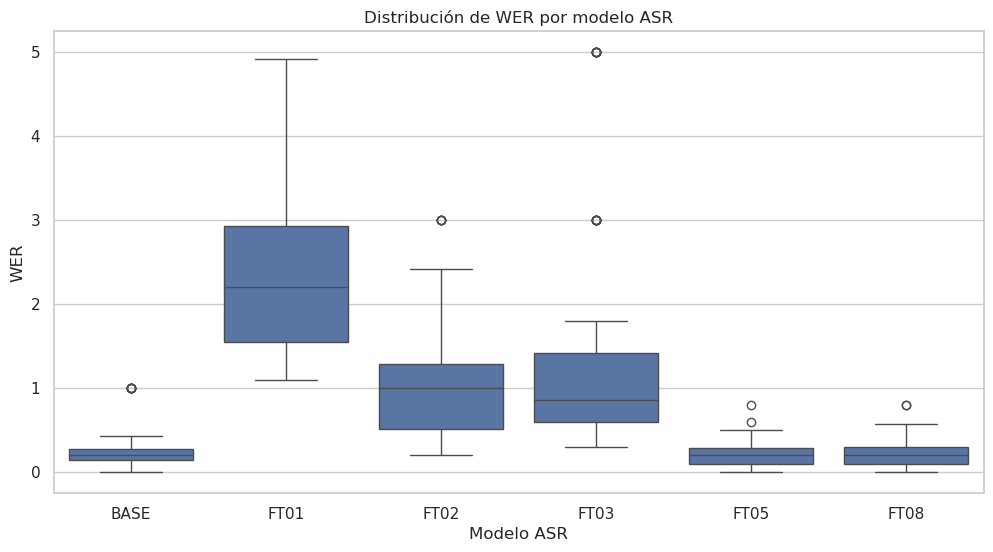

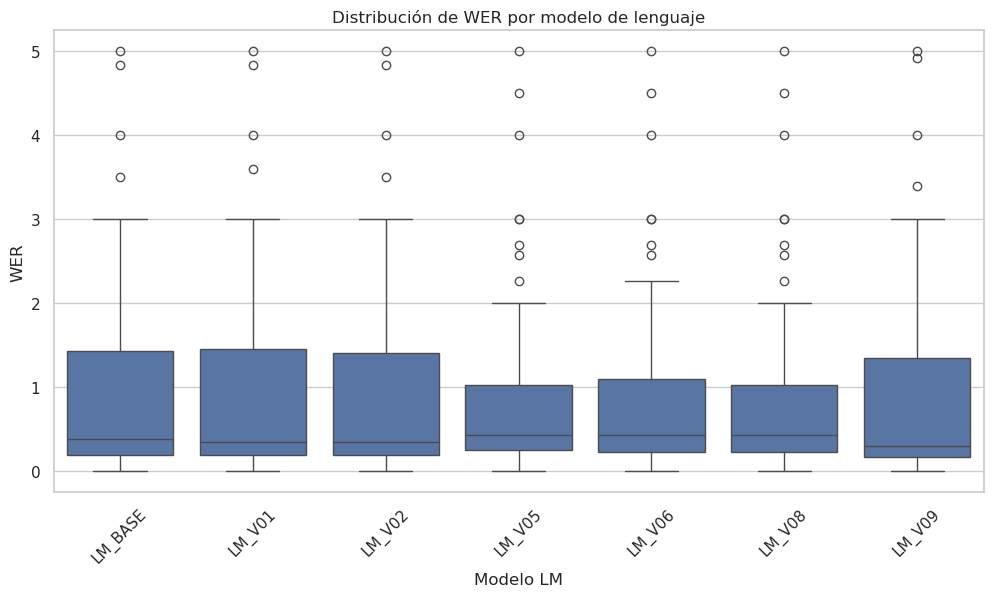

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el CSV generado por el script
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms.csv", sep=";")

# Mostrar las primeras filas
display(df.head())

# Convertir columnas numéricas
df["WER"] = pd.to_numeric(df["WER"])
df["CER"] = pd.to_numeric(df["CER"])

# Estilo general
sns.set(style="whitegrid")

# 📈 WER por modelo ASR
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="modelo_asr", y="WER")
plt.title("Distribución de WER por modelo ASR")
plt.ylabel("WER")
plt.xlabel("Modelo ASR")
plt.show()

# 📈 WER por modelo LM
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="modelo_lm", y="WER")
plt.title("Distribución de WER por modelo de lenguaje")
plt.ylabel("WER")
plt.xlabel("Modelo LM")
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_1330/3930785156.py:30: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  barplot = sns.barplot(


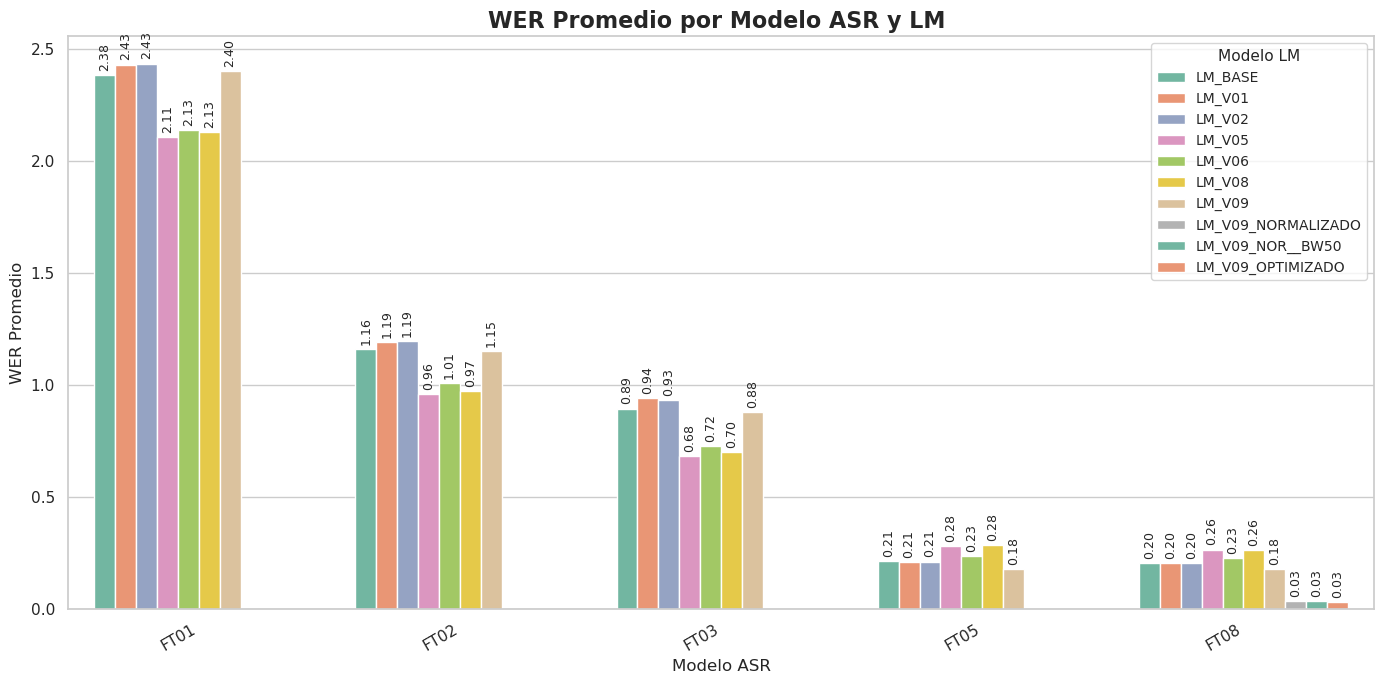

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar CSV
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms_mas_optimo2.csv", delimiter=";")

# Normalizar columnas (por si hay inconsistencias)
df["modelo_asr"] = df["modelo_asr"].str.upper().str.strip()
df["modelo_lm"] = df["modelo_lm"].str.upper().str.strip()

# Modelos a excluir
asr_excluir = ["BASE"]
lm_excluir = ["LM_V09_NORM", "LM_V09_OPT", "LM_V09_OPT_NORM"]

# Aplicar filtros
df_filtrado = df[
    ~df["modelo_asr"].isin(asr_excluir) &
    ~df["modelo_lm"].isin(lm_excluir)
]

# Calcular promedio WER
avg_wer = df_filtrado.groupby(["modelo_asr", "modelo_lm"])["WER"].mean().reset_index()

# Estilo y gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
palette = sns.color_palette("Set2")

barplot = sns.barplot(
    data=avg_wer,
    x="modelo_asr",
    y="WER",
    hue="modelo_lm",
    palette=palette
)

# Etiquetas sobre las barras (vertical)
for container in barplot.containers:
    barplot.bar_label(
        container,
        fmt='%.2f',
        label_type='edge',
        fontsize=9,
        rotation=90,
        padding=3
    )

# Títulos y formato
plt.title("WER Promedio por Modelo ASR y LM ", fontsize=16, fontweight="bold")
plt.ylabel("WER Promedio", fontsize=12)
plt.xlabel("Modelo ASR", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="Modelo LM", title_fontsize=11, fontsize=10)
plt.tight_layout()

# Mostrar gráfico
plt.show()





/tmp/ipykernel_1330/2214390761.py:30: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  barplot = sns.barplot(


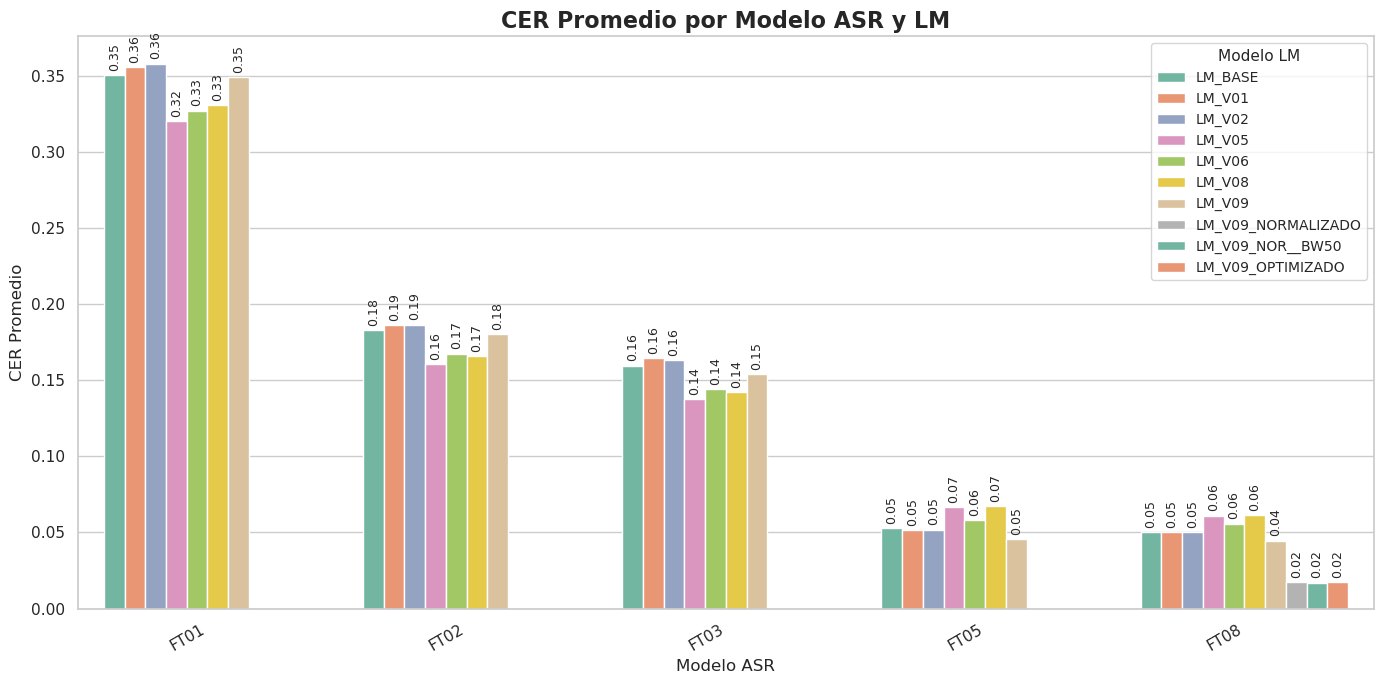

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar CSV
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms_mas_optimo2.csv", delimiter=";")

# Normalizar nombres
df["modelo_asr"] = df["modelo_asr"].str.upper().str.strip()
df["modelo_lm"] = df["modelo_lm"].str.upper().str.strip()

# Exclusiones
asr_excluir = ["BASE"]
lm_excluir = ["LM_V09_NORM", "LM_V09_OPT", "LM_V09_OPT_NORM"]

# Filtrar datos
df_filtrado = df[
    ~df["modelo_asr"].isin(asr_excluir) &
    ~df["modelo_lm"].isin(lm_excluir)
]

# Calcular promedio CER
avg_cer = df_filtrado.groupby(["modelo_asr", "modelo_lm"])["CER"].mean().reset_index()

# Estilo y gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
palette = sns.color_palette("Set2")

barplot = sns.barplot(
    data=avg_cer,
    x="modelo_asr",
    y="CER",
    hue="modelo_lm",
    palette=palette
)

# Etiquetas verticales
for container in barplot.containers:
    barplot.bar_label(
        container,
        fmt='%.2f',
        label_type='edge',
        fontsize=9,
        rotation=90,
        padding=3
    )

# Títulos y formato
plt.title("CER Promedio por Modelo ASR y LM", fontsize=16, fontweight="bold")
plt.ylabel("CER Promedio", fontsize=12)
plt.xlabel("Modelo ASR", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="Modelo LM", title_fontsize=11, fontsize=10)
plt.tight_layout()

# Mostrar gráfico
plt.show()



/tmp/ipykernel_12546/2767122520.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


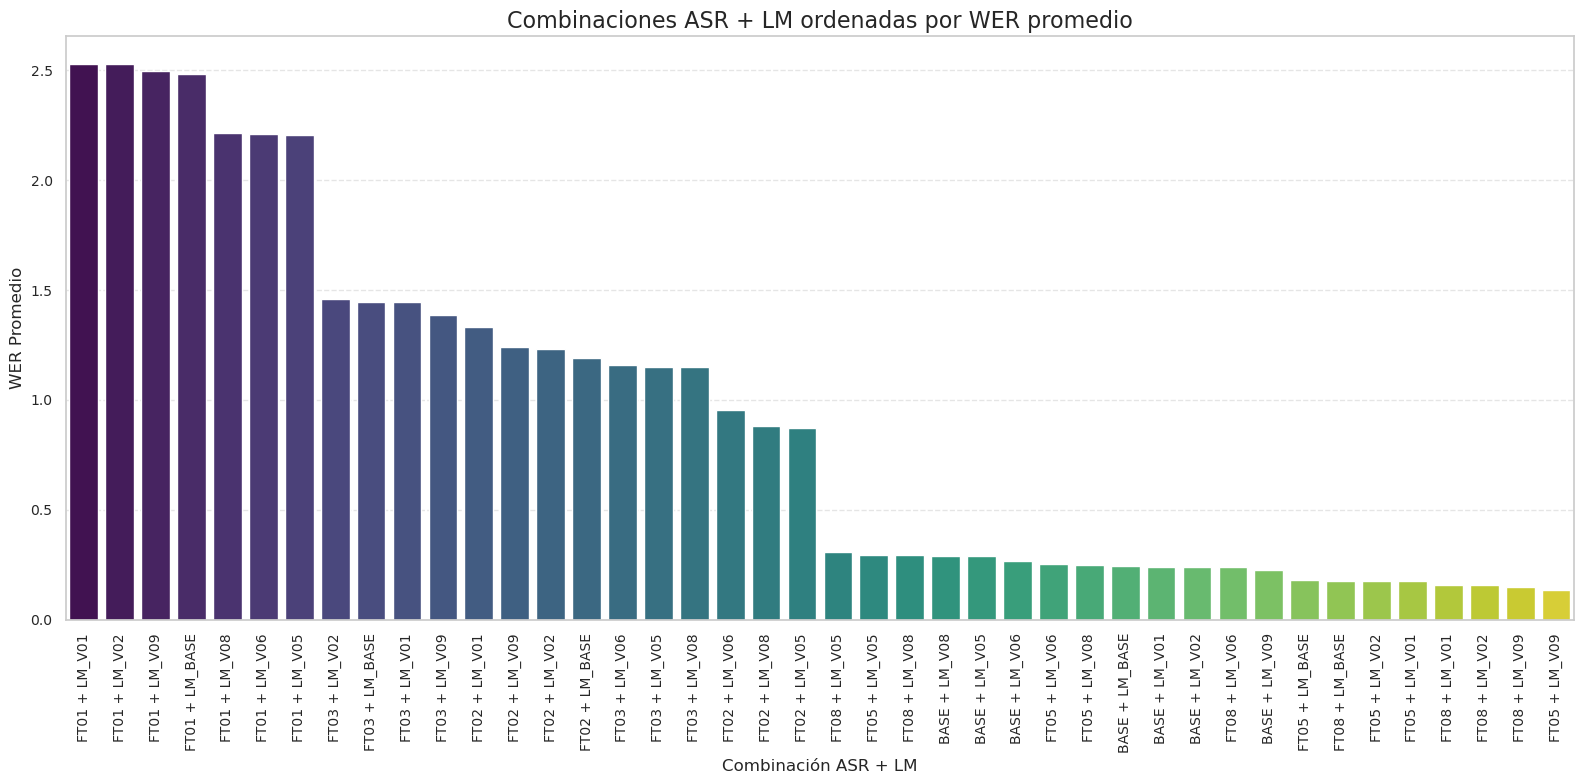

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV desde la ubicación correcta
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms.csv", delimiter=";")

# Crear una columna combinada de modelo_asr + modelo_lm
df["combinacion"] = df["modelo_asr"] + " + " + df["modelo_lm"]

# Calcular el WER promedio por combinación
promedios = df.groupby("combinacion")["WER"].mean().reset_index()

# Ordenar de peor a mejor (mayor a menor WER)
promedios = promedios.sort_values("WER", ascending=False)

# Gráfico
plt.figure(figsize=(16, 8))
barplot = sns.barplot(
    data=promedios,
    x="combinacion",
    y="WER",
    palette="viridis"
)

# Mejorar detalles visuales
plt.title("Combinaciones ASR + LM ordenadas por WER promedio", fontsize=16)
plt.xlabel("Combinación ASR + LM", fontsize=12)
plt.ylabel("WER Promedio", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



/tmp/ipykernel_12546/1196383352.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


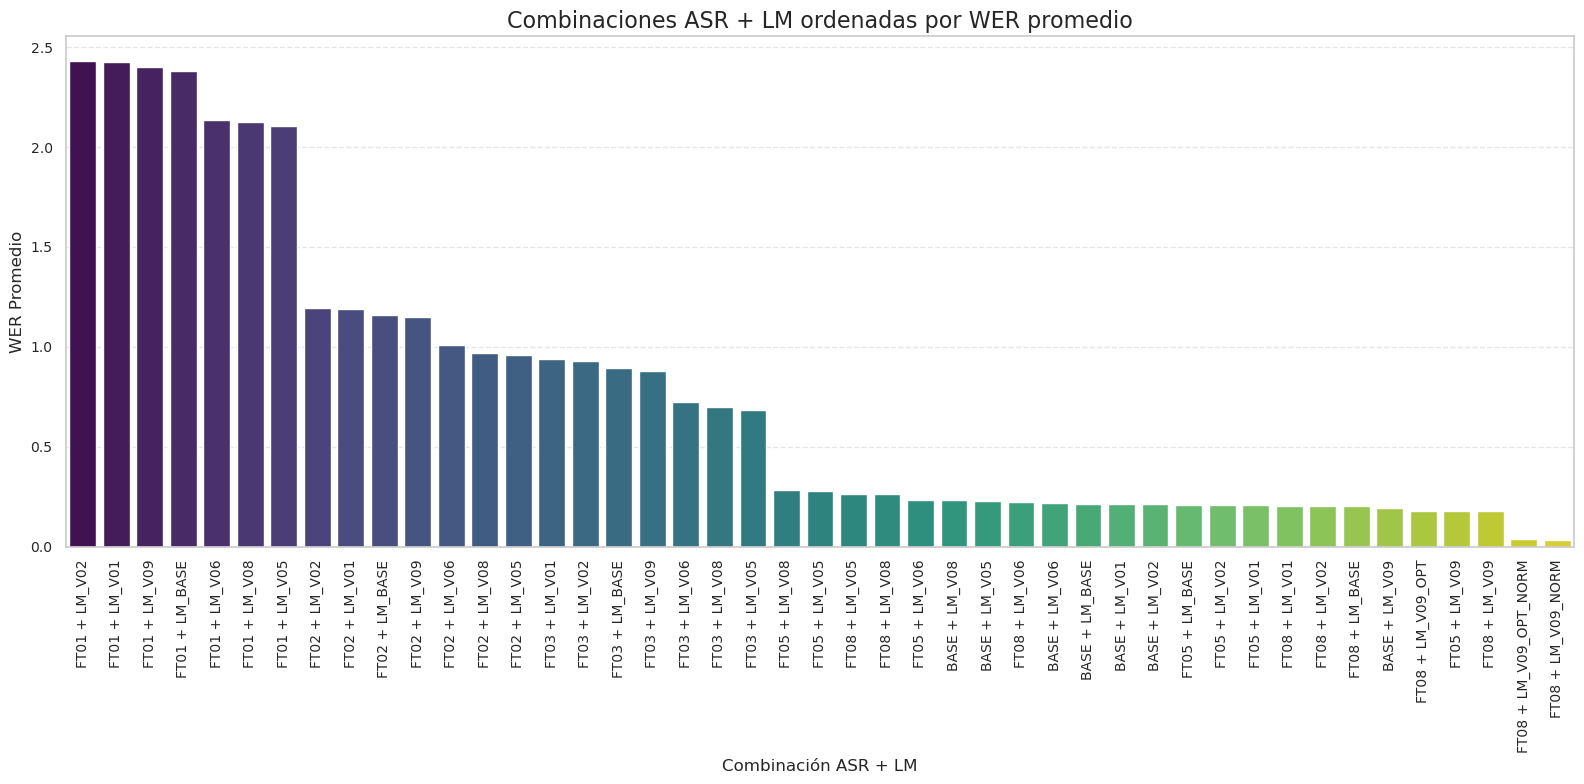

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV desde la ubicación correcta
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms_mas_optimo.csv", delimiter=";")

# Crear una columna combinada de modelo_asr + modelo_lm
df["combinacion"] = df["modelo_asr"] + " + " + df["modelo_lm"]

# Calcular el WER promedio por combinación
promedios = df.groupby("combinacion")["WER"].mean().reset_index()

# Ordenar de peor a mejor (mayor a menor WER)
promedios = promedios.sort_values("WER", ascending=False)

# Gráfico
plt.figure(figsize=(16, 8))
barplot = sns.barplot(
    data=promedios,
    x="combinacion",
    y="WER",
    palette="viridis"
)

# Mejorar detalles visuales
plt.title("Combinaciones ASR + LM ordenadas por WER promedio", fontsize=16)
plt.xlabel("Combinación ASR + LM", fontsize=12)
plt.ylabel("WER Promedio", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipykernel_12546/978069550.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedios, x="combinacion", y="CER", palette="viridis")


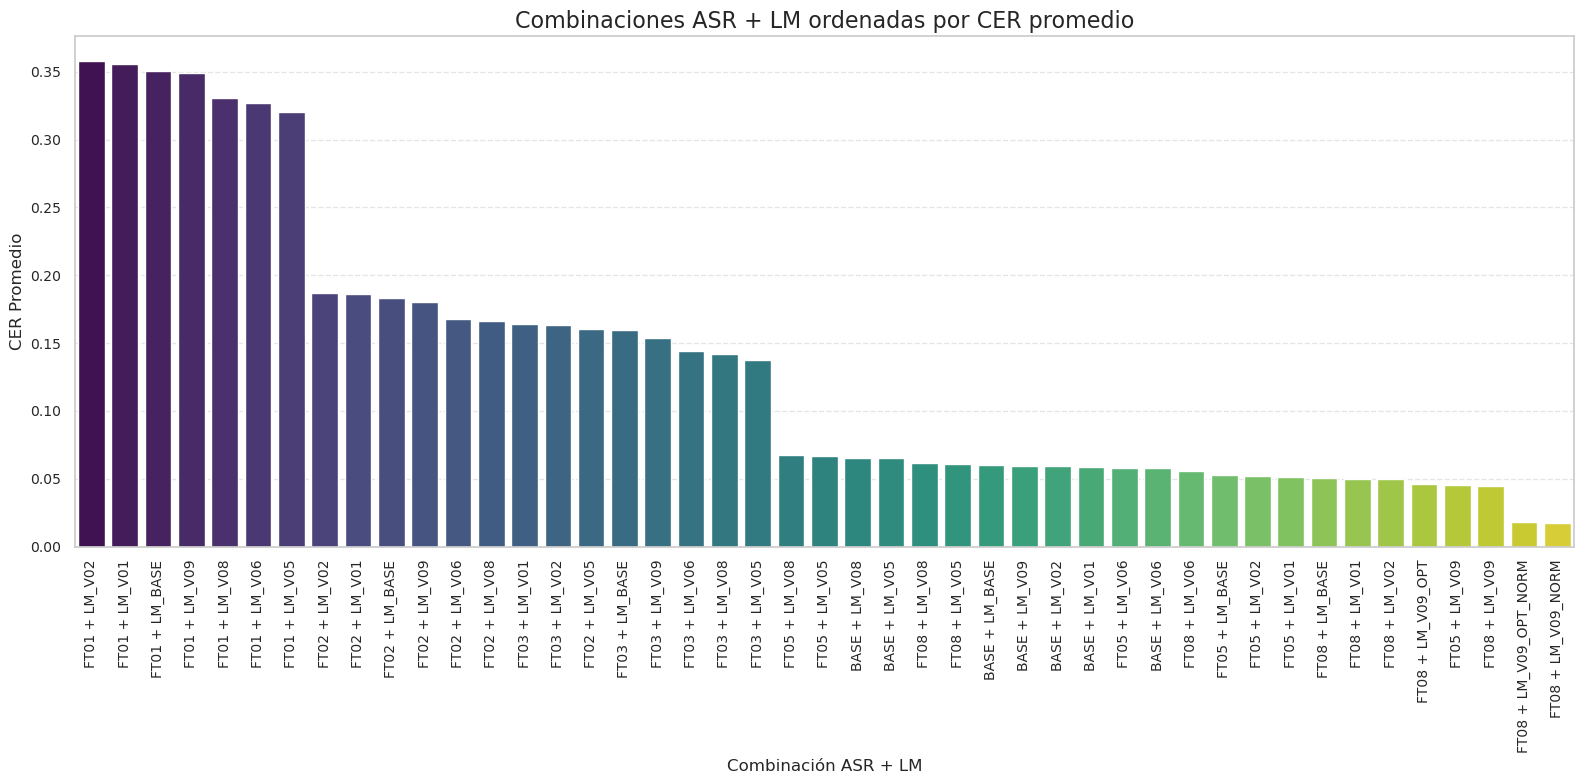

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV desde la ubicación correcta
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms_mas_optimo.csv", delimiter=";")

# Crear una columna combinada de modelo_asr + modelo_lm
df["combinacion"] = df["modelo_asr"] + " + " + df["modelo_lm"]

# Calcular el CER promedio por combinación
promedios = df.groupby("combinacion")["CER"].mean().reset_index()

# Ordenar de peor a mejor (mayor a menor CER)
promedios = promedios.sort_values("CER", ascending=False)

# Gráfico
plt.figure(figsize=(16, 8))
sns.barplot(data=promedios, x="combinacion", y="CER", palette="viridis")

# Mejorar detalles visuales
plt.title("Combinaciones ASR + LM ordenadas por CER promedio", fontsize=16)
plt.xlabel("Combinación ASR + LM", fontsize=12)
plt.ylabel("CER Promedio", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_12546/1196383352.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


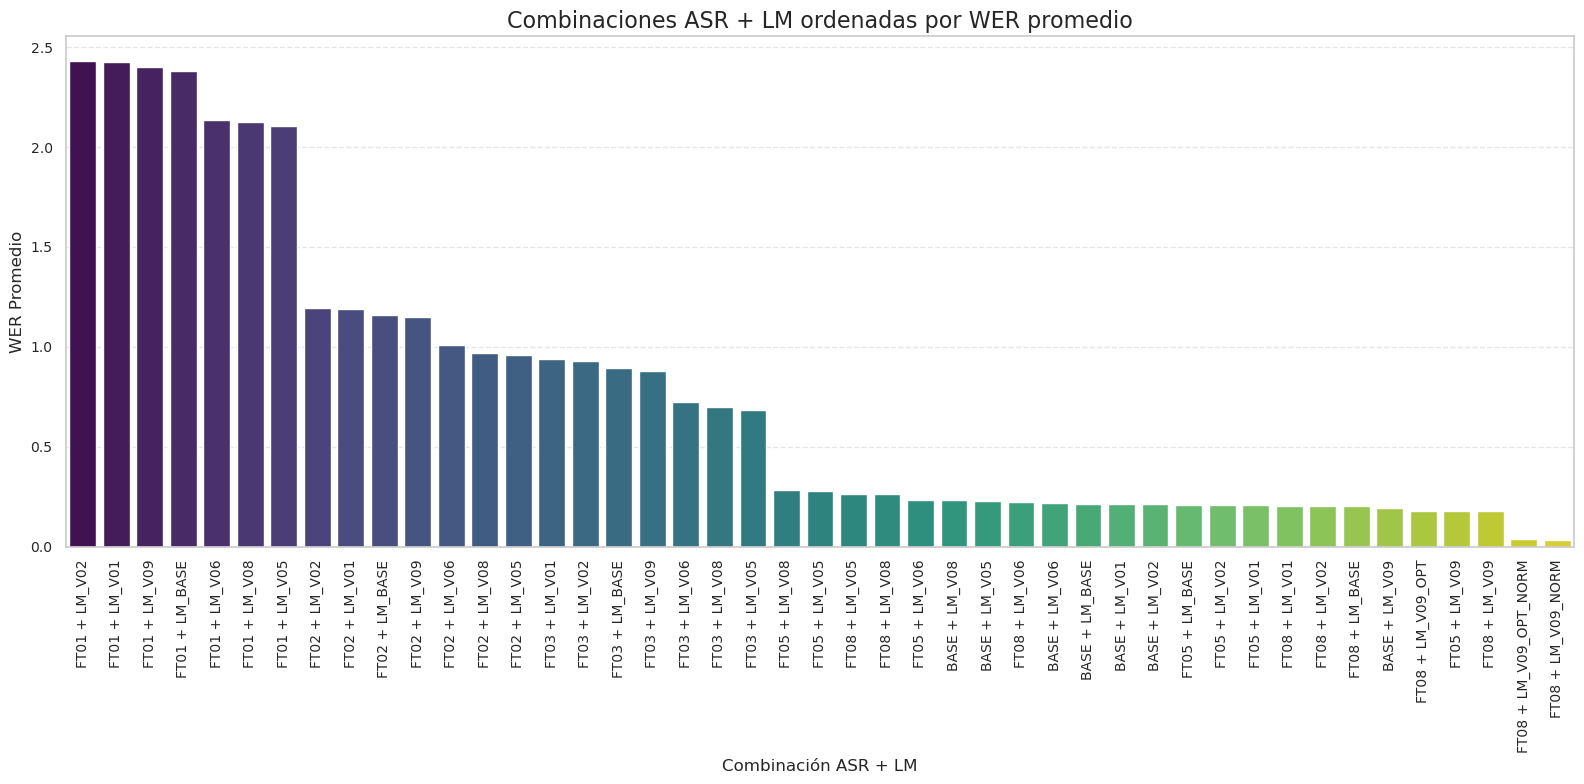

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV desde la ubicación correcta
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms_mas_optimo.csv", delimiter=";")

# Crear una columna combinada de modelo_asr + modelo_lm
df["combinacion"] = df["modelo_asr"] + " + " + df["modelo_lm"]

# Calcular el WER promedio por combinación
promedios = df.groupby("combinacion")["WER"].mean().reset_index()

# Ordenar de peor a mejor (mayor a menor WER)
promedios = promedios.sort_values("WER", ascending=False)

# Gráfico
plt.figure(figsize=(16, 8))
barplot = sns.barplot(
    data=promedios,
    x="combinacion",
    y="WER",
    palette="viridis"
)

# Mejorar detalles visuales
plt.title("Combinaciones ASR + LM ordenadas por WER promedio", fontsize=16)
plt.xlabel("Combinación ASR + LM", fontsize=12)
plt.ylabel("WER Promedio", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipykernel_4069/3029454478.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedios, x="combinacion", y="WER", palette="viridis")


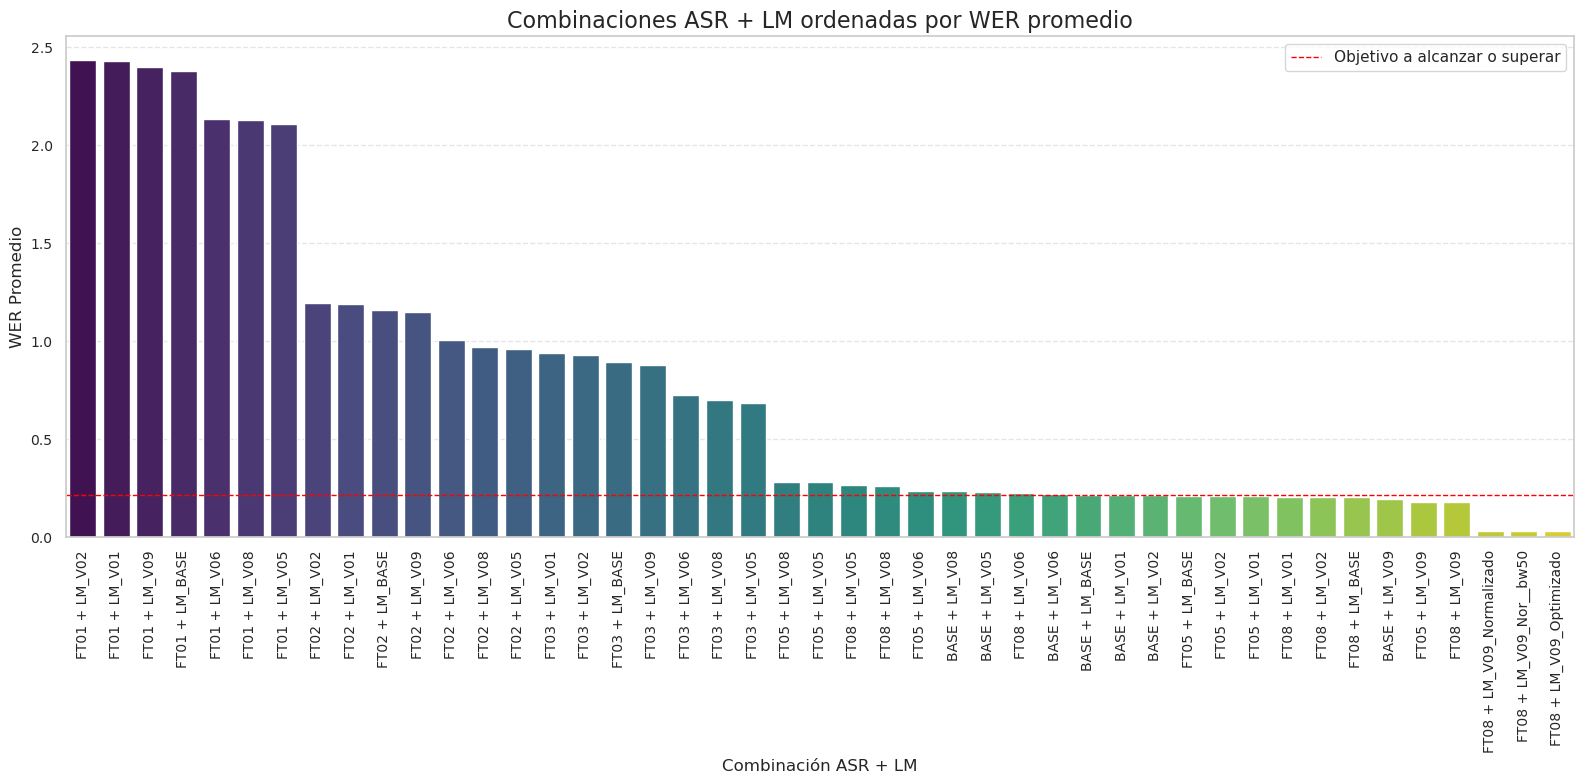

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms_mas_optimo2.csv", delimiter=";")

# Crear columna combinada
df["combinacion"] = df["modelo_asr"] + " + " + df["modelo_lm"]

# Calcular WER promedio por combinación
promedios = df.groupby("combinacion")["WER"].mean().reset_index()

# Obtener WER de referencia: BASE + LM_BASE
referencia_wer = promedios.loc[promedios["combinacion"] == "BASE + LM_BASE", "WER"].values[0]

# Ordenar combinaciones por WER
promedios = promedios.sort_values("WER", ascending=False)

# Gráfico
plt.figure(figsize=(16, 8))
sns.barplot(data=promedios, x="combinacion", y="WER", palette="viridis")

# Línea roja discontinua más fina con etiqueta personalizada
plt.axhline(y=referencia_wer, color="red", linestyle="--", linewidth=1,
            label="Objetivo a alcanzar o superar")

# Estética del gráfico
plt.title("Combinaciones ASR + LM ordenadas por WER promedio", fontsize=16)
plt.xlabel("Combinación ASR + LM", fontsize=12)
plt.ylabel("WER Promedio", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_12546/978069550.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedios, x="combinacion", y="CER", palette="viridis")


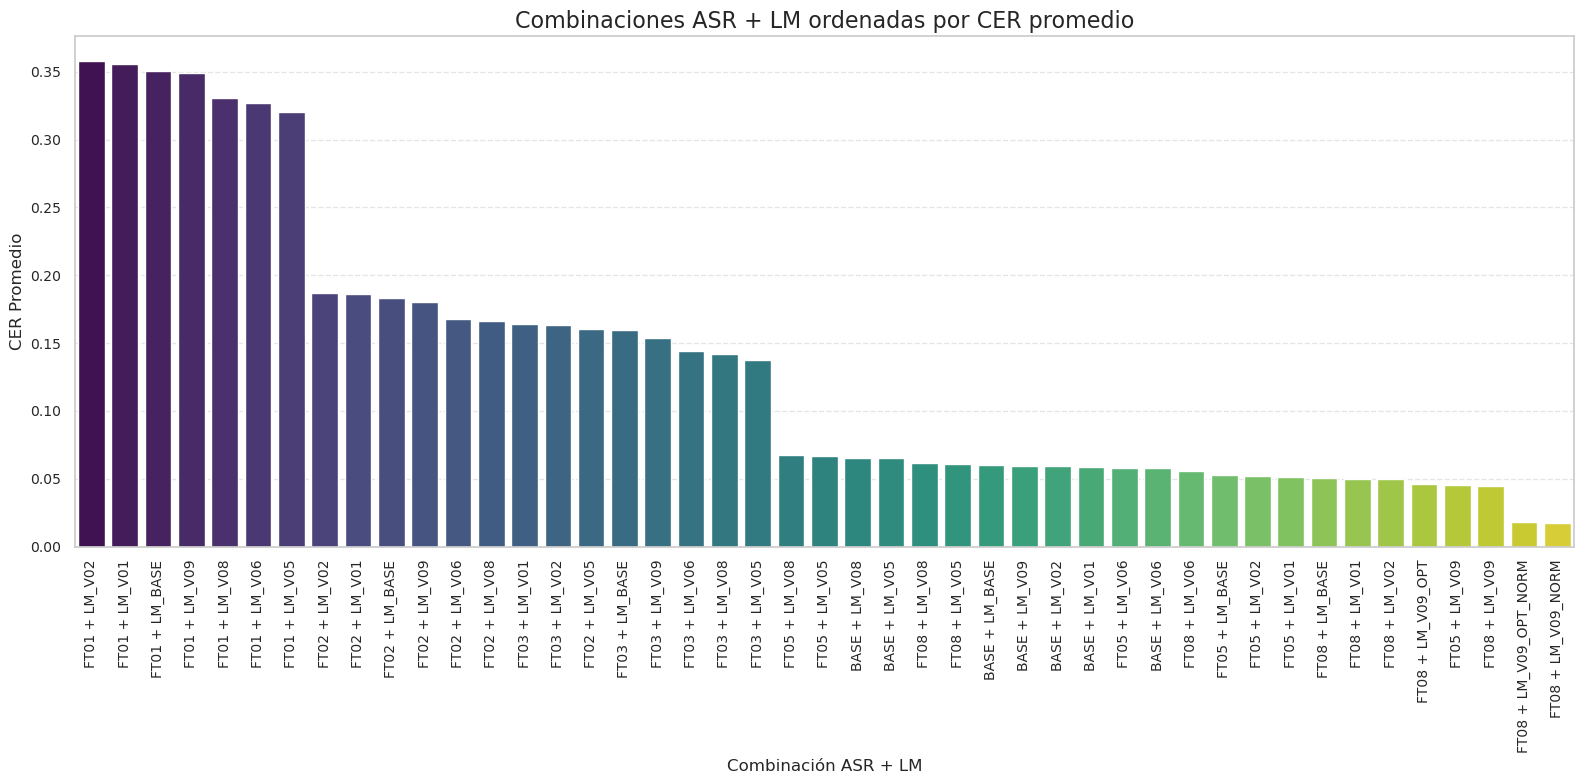

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV desde la ubicación correcta
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms_mas_optimo.csv", delimiter=";")

# Crear una columna combinada de modelo_asr + modelo_lm
df["combinacion"] = df["modelo_asr"] + " + " + df["modelo_lm"]

# Calcular el CER promedio por combinación
promedios = df.groupby("combinacion")["CER"].mean().reset_index()

# Ordenar de peor a mejor (mayor a menor CER)
promedios = promedios.sort_values("CER", ascending=False)

# Gráfico
plt.figure(figsize=(16, 8))
sns.barplot(data=promedios, x="combinacion", y="CER", palette="viridis")

# Mejorar detalles visuales
plt.title("Combinaciones ASR + LM ordenadas por CER promedio", fontsize=16)
plt.xlabel("Combinación ASR + LM", fontsize=12)
plt.ylabel("CER Promedio", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipykernel_4069/1301373229.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedios, x="combinacion", y="CER", palette="viridis")


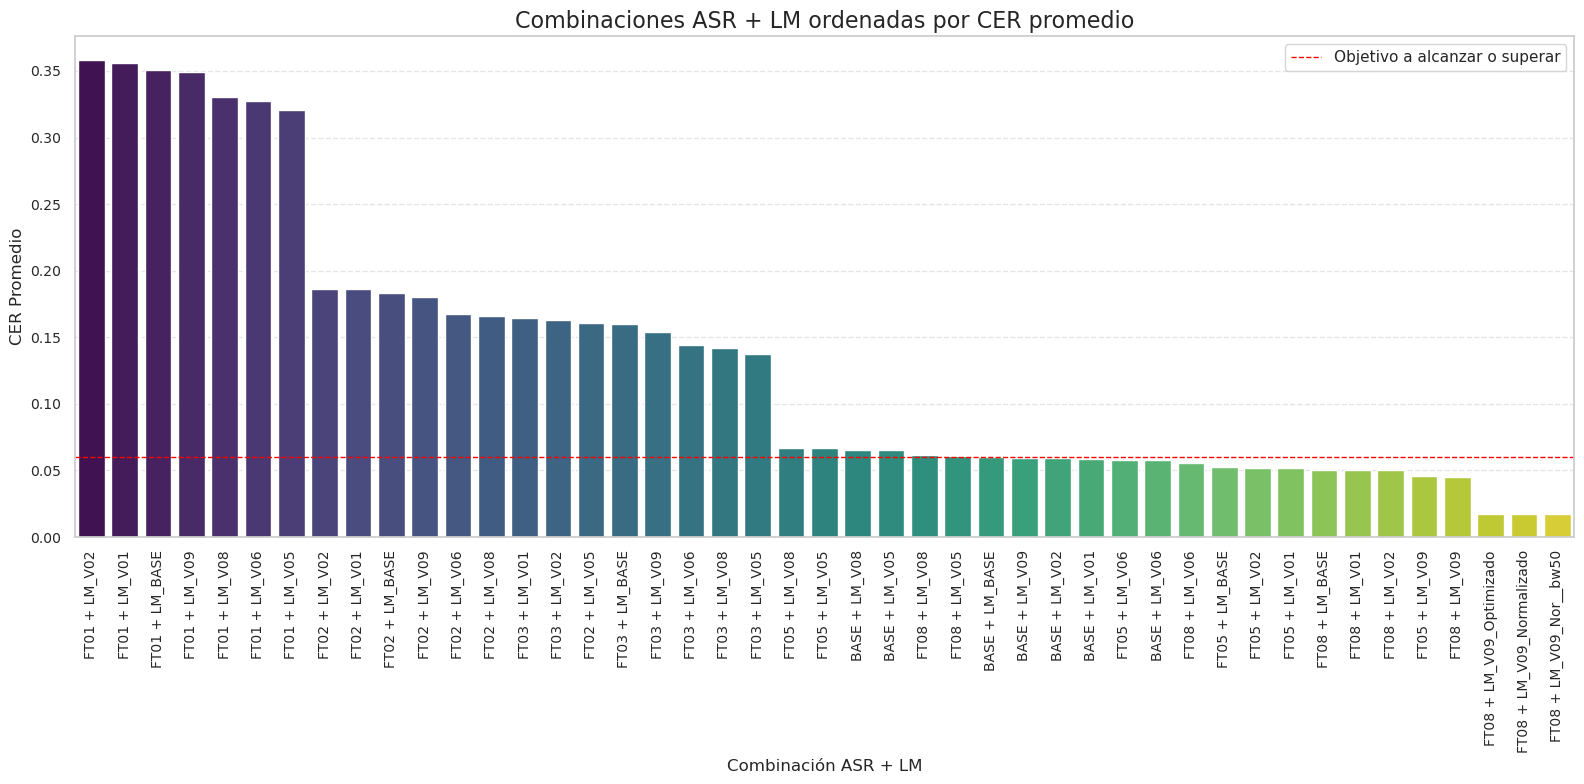

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV desde la ubicación correcta
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms_mas_optimo2.csv", delimiter=";")

# Crear una columna combinada de modelo_asr + modelo_lm
df["combinacion"] = df["modelo_asr"] + " + " + df["modelo_lm"]

# Calcular el CER promedio por combinación
promedios = df.groupby("combinacion")["CER"].mean().reset_index()

# Obtener CER de referencia: BASE + LM_BASE
referencia_cer = promedios.loc[promedios["combinacion"] == "BASE + LM_BASE", "CER"].values[0]

# Ordenar de peor a mejor (mayor a menor CER)
promedios = promedios.sort_values("CER", ascending=False)

# Gráfico
plt.figure(figsize=(16, 8))
sns.barplot(data=promedios, x="combinacion", y="CER", palette="viridis")

# Línea de referencia discontinua fina con etiqueta
plt.axhline(y=referencia_cer, color="red", linestyle="--", linewidth=1,
            label="Objetivo a alcanzar o superar")

# Mejorar detalles visuales
plt.title("Combinaciones ASR + LM ordenadas por CER promedio", fontsize=16)
plt.xlabel("Combinación ASR + LM", fontsize=12)
plt.ylabel("CER Promedio", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



In [25]:
import pandas as pd

# Cargar el CSV
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms_mas_optimo.csv", delimiter=";")

# Combinar modelo ASR y LM para referencia
df["combinacion"] = df["modelo_asr"] + " + " + df["modelo_lm"]

# Agrupar por combinación y calcular promedio de WER y CER
promedios = df.groupby("combinacion")[["WER", "CER"]].mean().reset_index()

# Convertir a porcentaje y redondear
promedios["WER"] = (promedios["WER"] * 100).round(2)
promedios["CER"] = (promedios["CER"] * 100).round(2)

# Obtener top 10 por menor WER (y luego CER si hay empate)
top10 = promedios.sort_values(by=["WER", "CER"]).head(44).reset_index(drop=True)

# Mostrar con estilo
top10.style.set_caption("🔝 Top 10 combinaciones ASR + LM con menor WER").format({
    "WER": "{:.2f}%",
    "CER": "{:.2f}%"
})


,combinacion,WER,CER
0,FT08 + LM_V09_NORM,3.19%,1.71%
1,FT08 + LM_V09_OPT_NORM,3.72%,1.83%
2,FT08 + LM_V09,17.77%,4.47%
3,FT05 + LM_V09,17.79%,4.55%
4,FT08 + LM_V09_OPT,18.07%,4.59%
5,BASE + LM_V09,19.42%,5.93%
6,FT08 + LM_BASE,20.26%,5.04%
7,FT08 + LM_V01,20.32%,5.01%
8,FT08 + LM_V02,20.32%,5.01%
9,FT05 + LM_V01,20.90%,5.16%


In [28]:
import pandas as pd
from IPython.display import display

# Cargar el CSV
df = pd.read_csv("../results/comparacion_todos_modelos_y_lms_mas_optimo2.csv", delimiter=";")

# Combinar modelo ASR y LM para referencia
df["combinacion"] = df["modelo_asr"] + " + " + df["modelo_lm"]

# Agrupar por combinación y calcular promedio de WER y CER
promedios = df.groupby("combinacion")[["WER", "CER"]].mean().reset_index()

# Convertir a porcentaje y redondear
promedios["WER"] = (promedios["WER"] * 100).round(2)
promedios["CER"] = (promedios["CER"] * 100).round(2)

# Obtener top combinaciones por menor WER (y luego CER en caso de empate)
top = promedios.sort_values(by=["WER", "CER"]).head(44).reset_index(drop=True)

# Mostrar con estilo
styled = top.style.set_caption("🔝 Top 44 combinaciones ASR + LM con menor WER").format({
    "WER": "{:.2f}%",
    "CER": "{:.2f}%"
})
display(styled)


,combinacion,WER,CER
0,FT08 + LM_V09_Optimizado,3.02%,1.73%
1,FT08 + LM_V09_Nor__bw50,3.19%,1.71%
2,FT08 + LM_V09_Normalizado,3.19%,1.73%
3,FT08 + LM_V09,17.77%,4.47%
4,FT05 + LM_V09,17.79%,4.55%
5,BASE + LM_V09,19.42%,5.93%
6,FT08 + LM_BASE,20.26%,5.04%
7,FT08 + LM_V01,20.32%,5.01%
8,FT08 + LM_V02,20.32%,5.01%
9,FT05 + LM_V01,20.90%,5.16%


In [5]:
import pandas as pd

# Cargar el CSV original
df = pd.read_csv("comparacion.csv", delimiter=";")

# Obtener el nombre de la primera columna
primera_columna = df.columns[0]

# Filtrar filas donde la primera columna comienza con '047.wav'
df_filtrado = df[df[primera_columna].astype(str).str.startswith("047.wav")]

# Guardar el resultado en un nuevo archivo
df_filtrado.to_csv("047.csv", index=False)
